# Exercise class 1 BBM: Solutions

A different kind of solutions as you might be used to: an attempt to solve all exercises using `sympy` and `scipy`. Interactive version is available at https://mybinder.org/v2/gh/TAdeJong/python-atomic-orbitals/master. 

Before we start with the actual solutions, we import a bunch of things:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

#Pretty printing of sympy functions
from IPython.display import display, Math
#Pretty printing of tables (Somewhat overkill, but so what)
import pandas as pd

from sympy.physics.hydrogen import R_nl
from sympy import var, simplify
from sympy import init_printing, latex
from sympy.utilities.lambdify import lambdify
from sympy import integrate, oo
import scipy.constants as sc
from scipy.constants import physical_constants as constants

In [2]:
init_printing()

# electronVolt is nice to have on hand
eV = constants["electron volt"][0]

# We set up both common symbols as well as a dictionary to easily subsitute later on
var('n l r m_e m_c m_p alpha c h hbar Z')
subs = {m_e: sc.m_e, m_p: sc.m_p, alpha:sc.alpha, c: sc.c, h: sc.h, hbar: sc.hbar}

## Exercise 1
As the only difference between Hydrogen and Deuterium is the mass of the core, the reduced mass difference should yield only a minor difference in wavelength. We define a reduced mass `mu`, an energy function `E_nl`, a wavelength conversion from energy `wavelength(energy)` and a energy difference `dE`. As all symbols used are `sympy` vars, these remain symbolic functions until we substitute in values.

<IPython.core.display.Math object>

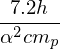

Wavelength difference: 0.178664956791962 nm


In [3]:


# Reduced mass for an electron with mass m_e and a core of mass m_c
mu = m_e*m_c / (m_e+m_c)

def E_nl(n, mu=mu,Z=1):
    return Z**2 * (alpha**2 * mu * c**2 / 2) / n**2
def dE(n_1, n_2, mu=mu, Z=1):
    """Energy difference between twoE_n states for a given reduced mass and Z"""
    return Z**2 * (alpha**2 * mu * c**2 / 2)*(1/n_1**2 - 1/n_2**2)

def wavelength(energy):
    return h*c/energy

E_Balmer = dE(2, 3)
display(Math("E_{{Balmer}} = {}".format(latex(E_Balmer))))
l_H = wavelength(E_Balmer).subs({m_c: m_p})
l_D = wavelength(E_Balmer).subs({m_c: 2*m_p})
display(simplify(l_H - l_D))
print("Wavelength difference: {} nm".format((l_H-l_D).evalf(subs=subs)*1e9))

## Exercise 2
Helium has two protons, so twice the charge. So mass differences are of relatively minor effect now, the difference in electrostatic potential has the major influence. 
The Hydrogen lines listed are the Balmer lines, so $n \to 2$. 

As we have: \\( E_{nl}(Z) = Z^2 \frac{E_1}{n^2} \\), the factor $Z^2=4$ for Helium can be compensated by taking a twice as high energy level, so $2n \to 4$, yielding lines in the same energy range.
However, odd initial states are also possible, yielding additional lines inbetween the existing lines.

A small remaining difference in wavelength can be explained by the core mass difference.

In [4]:
l_H = simplify(wavelength(dE(2, n_2=var('n')))).subs({m_c: m_p})
display(Math("\lambda_H = {}".format(latex(l_H))))
l_He = simplify(wavelength(dE(4, n_2=var('n'), Z=2))).subs({m_c: 4*m_p})
display(Math("\lambda_{{He^+}} = {}".format(latex(l_He))))

# Make a dictionary with the resulting wavelengths: substitute values of constants and lambdify for the initial Energy level n
data = {"H (nm)": lambdify(n, l_H.subs(subs) * 1e9)(np.arange(3,7)), 
        "He+ (nm)": lambdify(n, l_He.subs(subs) * 1e9)(np.arange(6,13))}
display(data)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

{'H (nm)': array([656.46960616, 486.27378234, 434.17301994, 410.29350385]),
 'He+ (nm)': array([656.20160872, 541.31109137, 486.07526572, 454.29342142,
        433.99577296, 420.10790823, 410.12600545])}

## Exercise 3
The (equivalent) Bohr radius $a_0$ is only dependent on the electrostatic potential $V(r) = -\frac{e^2}{4\pi \epsilon_0}\frac{1}{r}$, so we can calculate an equivalent Bohr radius for any single electron ion by substituting $e^2 \to Ze^2$, or $\alpha \to Z\alpha$ in the Bohr radius $a_0$. 
The same holds for the Bohr energy, but there it occurs quadratic.

In [5]:
a_0 = hbar/(Z*alpha*m_e*c)
display(Math("a_0 = {}".format(latex(a_0))))
display(Math("a_0(Z=91) = {} nm".format(a_0.subs({**subs, Z: 91})*1e9)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

For relativistic effects to be negligible, the energy of a level should be negligible compared to the rest mass of the electron. We look at the $n=2 \to n=1$ transition here:

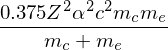

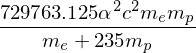

<IPython.core.display.Math object>

<IPython.core.display.Math object>

'A factor of only order 6 means relativistic effects are definitely not negligible here.'

'Just for fun we check how large the mass effect is here, by comparing with the case $m_c=1$: 84455.5619433155eV'

In [6]:
dE_U = dE(1,2,Z=91).subs({m_c: 235*m_p})
display(dE(1,2,Z=Z), dE_U)
l_U = simplify(wavelength(dE_U))
display(Math("\lambda_U = {} = {}nm".format(latex(l_U), l_U.subs(subs)*1e9)))
# Let's compare with the rest mass (equivalent energy) of the electron to see if this is a relativisticly relevant energy: 
display(Math("m_e = {}eV,\ E_{{2 \\to1}} = {}eV".format((m_e*c**2).subs(subs)/eV, dE_U.subs(subs)/eV)))
display("A factor of only order 6 means relativistic effects are definitely not negligible here.")
display("Just for fun we check how large the mass effect is here,"
        " by comparing with the case $m_c=1$: {}eV".format(dE(1,2,Z=91).subs({**subs, m_c: 1*sc.m_p})/eV))

## Exercise 4

To calculate the expectation values of any operator $\hat{A}$ in terms of $r$, we compute the following integral:

$$\int_0^\infty \hat A R_{nl}(r) r^2 dr$$

Using `sympy`'s `integrate`, we avoid doing many partial integrations by hand:

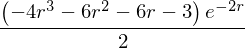

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
display(integrate(r * R_nl(1, 0, r, 1)**2 * r**2))
display(Math("\\langle r \\rangle _{{1s}} = {} a_0".format(integrate(r * R_nl(1, 0, r, 1)**2 * r**2, (r,0,oo)))))
display(Math("\\langle r \\rangle _{{2s}} = {} a_0".format(integrate(r * R_nl(2, 0, r, 1)**2 * r**2, (r,0,oo)))))
display(Math("\\langle r \\rangle _{{2p}} = {} a_0".format(integrate(r * R_nl(2, 1, r, 1)**2 * r**2, (r,0,oo)))))

## Exercise 5
For $\langle r^{-3}\rangle$, we only need to substitute the correct operator of course. The integrals however not neccesarily converge:

In [8]:
display(integrate(R_nl(1, 0, r, 1)**2 * r**-1))
display(Math("\\langle r^{{-3}} \\rangle _{{1s}} = {} a_0".format(integrate(r**-3 * R_nl(1, 0, r, 1)**2 * r**2, (r,0,oo)))))
# The 2s case actually trips sympy... 
#display(Math("\\langle r^{{-3}} \\rangle _{{2s}} = {} a_0".format(integrate(R_nl(2, 0, r, 1)**2 * r**-1, (r,0,oo)))))
display(Math("\\langle r^{{-3}} \\rangle _{{2p}} = {} a_0".format(integrate(R_nl(2, 1, r, 1)**2 * r**-1, (r,0,oo)))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Exercise 6
The classical turning point is where the kinetic energy is equal to the potential, where the potential is the electrostatic potential plus the effective potential due to the orbital angular momentum.
We will work in units $eV$ and $a_0$ to plot the curves to get a general idea and then use sympy to solve analytically.

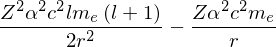

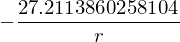

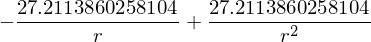

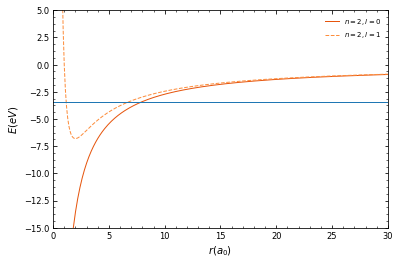

In [9]:
V = -alpha*hbar*c/r + hbar**2/(2*m_e) * l*(l+1)/r**2 # alpha*hbar*c = e^2/4 pi epsilon_0
V = V.subs({r: r*a_0})
display(V)
V = V.subs({Z: 1})

# OK, let's first plot this thing:
Vplot = V.subs(subs)/eV

x_np = np.linspace(0.001, 30, 300)
cmap = matplotlib.cm.get_cmap('tab20c')
linestyles = ['-', '--', '-.', ':']

for l_np in [0,1]:
    display(Vplot.subs({l:l_np}))
    plt.plot(x_np,lambdify(r, Vplot.subs({l:l_np}))(x_np), 
                 color=cmap(4*2-4+l_np),
                 linestyle=linestyles[l_np],
                 label="$n = {}, l = {}$".format(2, l_np))
    plt.legend()
plt.ylim([-15, 5])
plt.xlim([0, 30])
E_2 = -1*E_nl(2, mu=m_e).subs(subs)/eV
plt.axhline(E_2)
plt.xlabel('$r (a_0)$');
plt.ylabel('$E (eV)$');


Now we use `sympy.sovlers.solve` to solve the equations. It solves by putting the object equal to zero, so we substract $- E_2$ and after that solve for r.

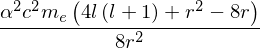

In [10]:
from sympy.solvers import solve
turning_point_equation = V + E_nl(2, mu=m_e)
display(turning_point_equation.simplify())

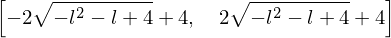

In [11]:
solutions = solve(turning_point_equation, r)
solutions

In [12]:
# Solutions for 2s, cast to float to compare with plot
[float(sol.subs({l:0})) for sol in solutions]

In [13]:
# Solutions for 2p
[float(sol.subs({l:1})) for sol in solutions]